# Analysis of US Senator Tweets
## This is part of a series of introductory data science projects in exploratory data analysis (EDA) which anyone who is a beginner in the field can follow along!

We first start by importing the needed libraries, and modules:

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

I got my dataset from Kaggle. In order to receive the same dataset, you have to create an account on Kaggle, pick and dowload your desired dataset, then proceed with the commands below. Keep in mind that when you do od.download() it will ask you for your Kaggle username and a token you can get through your Kaggle account. On your profile page, press Account, then press Create New API Token. This will download a json file. Open it and copy the API Token from it. The link that goes in the od.download() is the link on the Kaggle site where you found your dataset.

In [149]:
import opendatasets as od

In [150]:
od.download('https://www.kaggle.com/rishidamarla/tweets-of-us-senators')

Skipping, found downloaded files in ".\tweets-of-us-senators" (use force=True to force download)


In [151]:
df = pd.read_csv(r"C:/Users/elape/ReviewPython/untitled1/tweets-of-us-senators/senators.csv",encoding='latin-1')

Let's take a look at the data we have:

In [152]:
df.head()

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/17 21:47,We released bipartisan healthcare bill today &...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/17 18:48,I spoke with @Morning_Joe team abt #HonestAds ...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/17 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/17 18:04,"Today's the day @MarkWarner, @SenJohnMcCain &a...",https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/17 16:33,".@MarkWarner, @SenJohnMcCain &amp; I put toget...",https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288615 entries, 0 to 288614
Data columns (total 10 columns):
created_at     288615 non-null object
text           288615 non-null object
url            288615 non-null object
replies        288615 non-null int64
retweets       288615 non-null int64
favorites      288615 non-null int64
user           288615 non-null object
bioguide_id    288615 non-null object
party          288615 non-null object
state          288615 non-null object
dtypes: int64(3), object(7)
memory usage: 22.0+ MB


Looking at the cell above we see that we get the following data info: 
1. when the tweet was made
2. what the tweet was
3. how many replies it got
4. how many times it got retweeted
5. how many times it was liked
6. who the user is
7. their bioguide id
8. their respected party
9. and the state they represent

Since this dataset includes hundreds of thousands of tweets from current and past US senators during their tenure, we can look up some of the old tweets of current vice-president @KamalaHarris.

In [63]:
df[df['user']=="SenKamalaHarris"].head()

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
219131,10/19/17 23:21,Happy Diwali! May the victory of light over da...,https://twitter.com/SenKamalaHarris/status/921...,39,542,2416,SenKamalaHarris,H001075,D,CA
219132,10/19/17 21:33,The perfect early birthday surprise in the off...,https://twitter.com/SenKamalaHarris/status/921...,82,108,1188,SenKamalaHarris,H001075,D,CA
219133,10/19/17 21:04,Hereäó»s why it was so important to pass the C...,https://twitter.com/SenKamalaHarris/status/921...,15,174,516,SenKamalaHarris,H001075,D,CA
219134,10/19/17 16:26,We owe Gold Star families the thanks of a grat...,https://twitter.com/SenKamalaHarris/status/921...,100,2180,9386,SenKamalaHarris,H001075,D,CA
219135,10/18/17 21:41,RT @SenCortezMasto: HAPPENING SOON: I will be ...,https://twitter.com/SenKamalaHarris/status/920...,17,66,201,SenKamalaHarris,H001075,D,CA


Let's see which party is more present on Twitter:

In [36]:
df['party'].max()

'R'

'R' would represent the republican party!

Let's see the senators! (..and how much they tweet eh.)

Text(0.5, 1.0, 'tweets by senator')

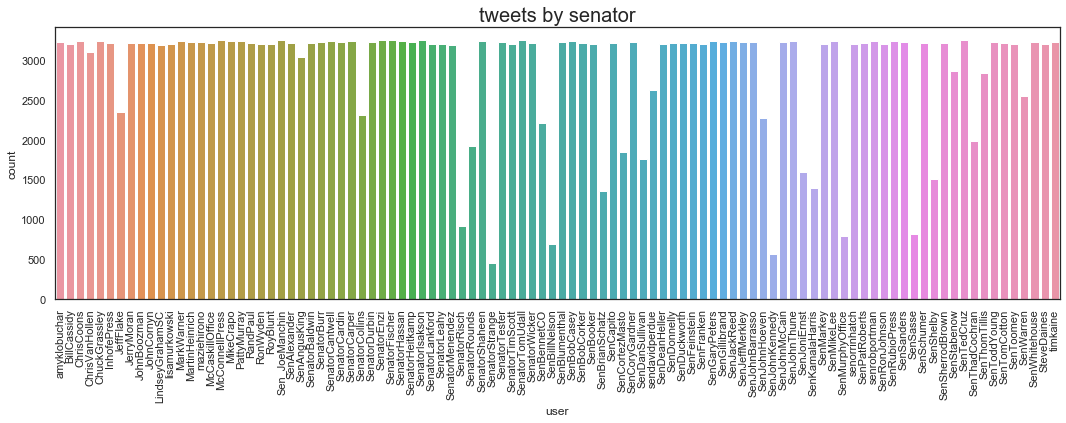

In [62]:
plt.figure(figsize=(18,5))
sns.countplot(df['user'])
plt.xticks(rotation=90)
plt.title('tweets by senator',fontsize=20)

What was the average amount of retweets of US senators's tweets?

In [54]:
df.groupby(['user','party'])['retweets'].mean().sort_values()

user             party
SenMurphyOffice  D           1.282663
SenatorRounds    R           5.702083
SenJohnHoeven    R           5.758454
JohnBoozman      R           6.301775
SenCapito        R           6.574984
                             ...     
SenatorLeahy     D        1432.857633
SenKamalaHarris  D        1687.795683
SenWarren        D        1955.387274
SenCortezMasto   D        2164.965854
SenSanders       I        4700.479205
Name: retweets, Length: 100, dtype: float64

Seems like Senator Sanders would get the most retweets on his tweets on average. Who had the most tweets so far?

In [73]:
df.groupby(['user','party'])['text'].count().sort_values(ascending=False).head(1)

user            party
SenatorFischer  R        3247
Name: text, dtype: int64

Deb Fischer is the US Senator of Nebraska. Since this dataset has only tweets until the end of 2017, let's take a look at tweets made during that year:

In [144]:
year_17 = df[df['created_at'].apply(lambda x: x[6:8] == '17')].head()
year_17

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/17 21:47,We released bipartisan healthcare bill today &...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/17 18:48,I spoke with @Morning_Joe team abt #HonestAds ...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/17 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/17 18:04,"Today's the day @MarkWarner, @SenJohnMcCain &a...",https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/17 16:33,".@MarkWarner, @SenJohnMcCain &amp; I put toget...",https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN


Now we can look at which tweets got the most retweets in year 2017.

In [124]:
df[ (df['created_at'].apply(lambda x: x[6:8] == '17'))].sort_values(by='retweets',ascending=False).head()

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
129663,10/10/17 20:59,"RT @Malala: 5 years ago, I was shot in an atte...",https://twitter.com/SenatorShaheen/status/9178...,11053,356284,1156950,SenatorShaheen,S001181,D,NH
120448,10/17/17 2:39,RT @BarackObama: I'm grateful to @SenJohnMcCai...,https://twitter.com/SenatorLeahy/status/920116...,17142,90043,643181,SenatorLeahy,L000174,D,VT
219158,10/17/17 16:10,The deadliest mass shooting in our countryäó»s...,https://twitter.com/SenKamalaHarris/status/920...,2005,51728,144919,SenKamalaHarris,H001075,D,CA
243917,10/12/17 17:29,"We looked into it, @realDonaldTrump. Itäó»s ca...",https://twitter.com/SenSanders/status/91852919...,2298,46738,132443,SenSanders,S000033,I,VT
211092,10/17/17 1:23,To refuse US leadership for half-baked nationa...,https://twitter.com/SenJohnMcCain/status/92009...,3881,30393,74929,SenJohnMcCain,M000303,R,AZ


We can also take a look at the tweets from republican senators who got the most retweets in 2017:

In [153]:
df[ (df['created_at'].apply(lambda x: x[6:8] == '17')) & (df['party'] == 'R')].sort_values(by='retweets',ascending=False).head()

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
211092,10/17/17 1:23,To refuse US leadership for half-baked nationa...,https://twitter.com/SenJohnMcCain/status/92009...,3881,30393,74929,SenJohnMcCain,M000303,R,AZ
263944,10/13/17 18:12,"RT @realDonaldTrump: Today, I announced our st...",https://twitter.com/SenThomTillis/status/91890...,24193,17551,66183,SenThomTillis,T000476,R,NC
143021,10/11/17 23:50,RT @realDonaldTrump: We need a tax system that...,https://twitter.com/SenatorWicker/status/91826...,11043,12267,56514,SenatorWicker,W000437,R,MS
211069,10/19/17 18:47,"Important speech by my friend, President Georg...",https://twitter.com/SenJohnMcCain/status/92108...,2006,11054,44685,SenJohnMcCain,M000303,R,AZ
60263,10/10/17 11:55,This will be a great plan &amp; a big deal for...,https://twitter.com/RandPaul/status/9177201530...,2081,10852,27051,RandPaul,P000603,R,KY


Now let's look at the average replies, retweets and liked tweets from different parties - D, R, I(independent) received:

In [143]:
pie_chart = df.groupby(['party'])[['replies', 'retweets', 'favorites']].mean()
pie_chart

,replies,retweets,favorites
party,,,
D,39.165525,332.178694,739.269058
I,220.096563,2427.410871,6395.941807
R,36.827472,78.405263,195.843927


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000282AB564EC8>,
      dtype=object)

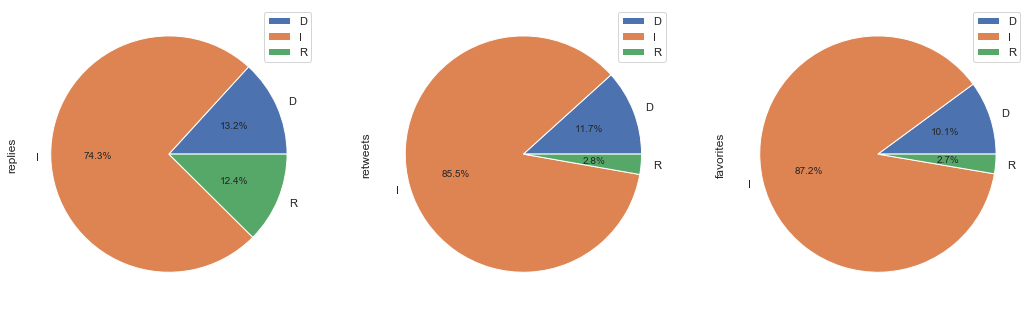

In [141]:
pie_chart.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = pie_chart.index)

Tweets from the independent party get the most love! When it comes to replies on tweets, republican and democratic senators get around a similar number of replies. When it comes to retweets and likes, republican senators tend to get less of them than democrats do.